## Modeling

### 1.1) Importing modules and Reading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
x_train=pd.read_csv("x_train.csv")
y_train=pd.read_csv("y_train.csv")
x_test=pd.read_csv("x_test.csv")
y_test=pd.read_csv("y_test.csv")

Dropping unencessary columns.

In [ ]:
x_train.drop(["Unnamed: 0"],inplace=True,axis=1)
y_train.drop(["Unnamed: 0"],inplace=True,axis=1)
x_test.drop(["Unnamed: 0"],inplace=True,axis=1)
y_test.drop(["Unnamed: 0"],inplace=True,axis=1)

View the initial rows of our training data features.







In [ ]:
x_train.head()

,Age,Blood Type,Hospital,Insurance Provider,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,-0.839634,1.090645,-1.336859,1.447532,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
1,-0.124035,0.655613,-0.731117,0.736904,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,-0.495540,-0.494761,1.951771
2,-0.532949,-0.649482,-1.443343,-1.394980,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355
3,1.562733,-0.649482,1.550938,0.026276,-0.438330,-0.456746,-0.458336,-0.438061,2.215165,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
4,0.182650,1.525677,-1.394246,-0.684352,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355



Analyze the frequency of occurrences for values within our training target variable.

In [ ]:
y_train.value_counts()

Test Results
1               3090
0               2941
dtype: int64


* The target data values display a balanced distribution, indicating no requirement for upsampling.

View the initial rows of our testing data features.







In [ ]:
x_test.head()

,Age,Blood Type,Hospital,Insurance Provider,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,1.548243,-0.277910,0.546951,-0.047392,-0.470534,-0.439082,-0.404283,-0.443967,2.240130,-0.477703,-0.506129,-0.503774,-0.506129,-0.470534,1.948615
1,-0.691240,-0.725541,-1.504806,-0.744580,-0.470534,-0.439082,-0.404283,-0.443967,-0.446403,2.093350,-0.506129,1.985019,-0.506129,-0.470534,-0.513185
2,1.548243,-0.277910,1.679692,0.649796,-0.470534,-0.439082,2.473516,-0.443967,-0.446403,-0.477703,-0.506129,-0.503774,1.975779,-0.470534,-0.513185
3,1.349178,1.064983,-1.520835,-0.047392,2.125245,-0.439082,-0.404283,-0.443967,-0.446403,-0.477703,-0.506129,-0.503774,-0.506129,2.125245,-0.513185
4,-0.541941,1.512614,1.455281,1.346984,-0.470534,-0.439082,2.473516,-0.443967,-0.446403,-0.477703,-0.506129,1.985019,-0.506129,-0.470534,-0.513185



Examine the occurrence count of our testing target variable's values.




In [ ]:
y_test.value_counts()

Test Results
1               348
0               314
dtype: int64

### 1. Logistic Regression


Import the LogisticRegression module from the sklearn library.

In [ ]:
from sklearn.linear_model import LogisticRegression


Creating an instance of logistic regression as a binary classifier.

In [ ]:
model = LogisticRegression()

Training the Logistic Regression model by fitting it with the training data.

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()


Obtaining predictions from the model using the training data to assess for overfitting and acquiring predictions from the testing data to evaluate the model's performance.

In [ ]:
y_pred=model.predict(x_test)
y_pred_train=model.predict(x_train)


Evaluating the accuracy of predictions made on both the training and testing datasets.

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train,y_pred_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,y_pred)*100:.2f}")

Metrics train:
	Accuracy score: 51.95
Metrics Test:
	Accuracy score: 50.45


Visualizing the confusion matrix to further evaluate the model's performance.

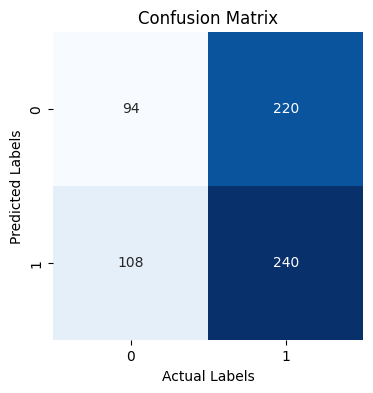

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

Based on this Conusion matrix Evaluation :

* **94** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **240** instances were correctly predicted as class 1 **```(True Positives)```**.

* **220** instances were predicted as class 1 but were actually class 0 **```(False Positives)```**.
* **108** instances were predicted as class 0 but were actually class 1 **```(False Negatives)```**.

The model exhibits a notably high rate of false negatives, suggesting a tendency to make insufficient predictions for normal cases,while maintaining fewer mispredictions for abnormal cases. This bias is evident in the model's stronger prediction performance for class 1 with fewer mistakes, whereas for class 0, it frequently mispredicts, resulting in more substantial errors.





For additional validation of the model's performance, we will analyze its Classification Report, focusing on metrics such as recall, precision, and f1 score.

In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.47      0.30      0.36       314
           1       0.52      0.69      0.59       348

    accuracy                           0.50       662
   macro avg       0.49      0.49      0.48       662
weighted avg       0.49      0.50      0.49       662



* Based on the classification report of this model, we can see that the precision,recall and f1 score for class 0 is very low which indicates and confirms the high false predictions this model achieve regarding class 0,while it attain a noticbly better metrics for class 1.

Plotting the ROC Curve and AUC aids in identifying an optimal threshold to minimize the False positive Rate, aiming to enhance the model's performance by effectively reducing missed negative predictions.

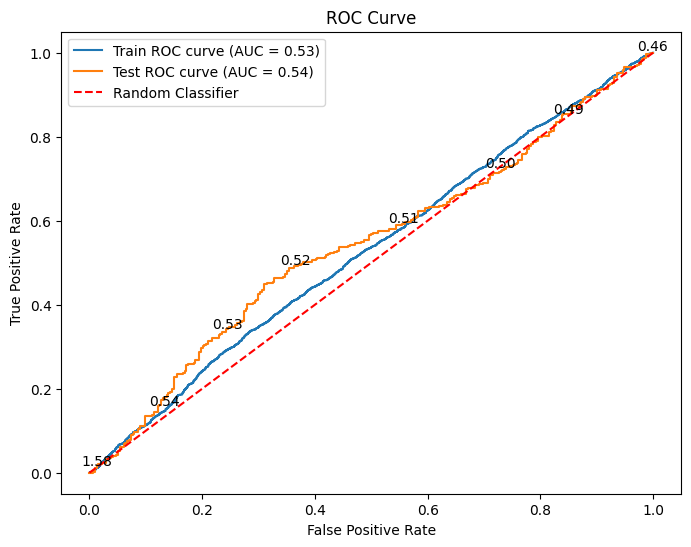

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
train_probs = model.predict_proba(x_train)[:, 1]
test_probs = model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the ROC curve for test set
fpr_test, tpr_test,thresholds_test = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

for i, threshold in enumerate(thresholds_test):
    if i % 50 == 0:  # Display a subset of thresholds for better readability
        plt.annotate(f'{threshold:.2f}', (fpr_test[i], tpr_test[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


- The identified threshold of 0.52 offers the optimal balance, effectively reducing False positive Rate while concurrently elevating True positive Rate, thereby enhancing the model's ability to accurately classify positive instances.

In [ ]:
threshold=0.519

test_prob=model.predict_proba(x_test)

predicted_labels = (test_prob[:, 1] >= threshold).astype(int)


Generate predictions post-adjusting the threshold to 0.52, thereby refining the model's classification outcomes to prioritize improved accuracy in distinguishing positive instances.

Recalculating the accuracy of the generated predictions after modifying the threshold to 0.52 to assess potential enhancements in the model's performance

In [ ]:
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_test,predicted_labels)*100:.2f}")

Metrics Test:
	Accuracy score: 56.34



* A clear observation is the 6% increase in prediction accuracy, suggesting that the chosen threshold value was optimal and played a role in improving the model's performance

Re-analyzing the confusion matrix  to confirm the improvement in predicting true negatives and reducing the previously observed mispredictions towards class 0.

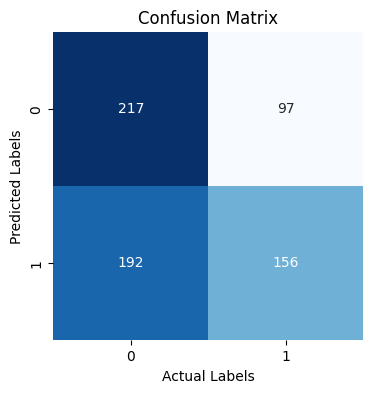

In [ ]:
cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

[[True Negative   False Positive]<br>
 [False Negative   True Positive]]


Based on this Conusion matrix Evaluation :

* **217** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **156** instances were correctly predicted as class 1 **```(True Positives)```**.

* **192** instances were predicted as class 1 but were actually class 0 **```(False Negatives)```**.
* **97** instances were predicted as class 0 but were actually class 1 **```(False Positives)```**.

* Notably observed is the substantial improvement in accurately predicting instances belonging to class 0, rising notably from 70 to 217, accompanied by a considerable decrease in mispredictions associated with this class.

In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, predicted_labels))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       314
           1       0.62      0.45      0.52       348

    accuracy                           0.56       662
   macro avg       0.57      0.57      0.56       662
weighted avg       0.58      0.56      0.56       662



Concerning the previously observed metrics - precision, recall, and F1-score - notable improvements were evident following the adjustment of the threshold value. This adjustment notably reduced the mispredictions in class 0, showcasing a significant enhancement in performance.

### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
min_samples_split_list = [2,10,20, 30, 50,70, 100,150, 200, 300,400 ,700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4,8,10,16,20,25, 32, 64,70,80,100, None]

Iterating through all values in the Min samples split list to assess our model's performance on both train and test data, emphasizing the objective of preventing overfitting by finding an optimal parameter value for splitting nodes.

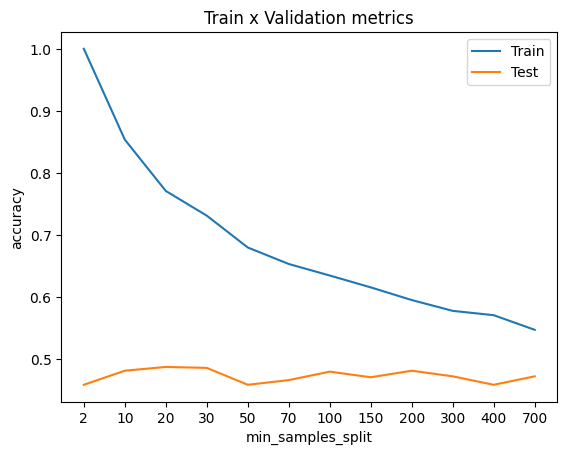

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset

    predictions_val = model.predict(x_test) ## The predicted values for the test dataset

    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

From the graph,the best value for  min_samples_split = 30

Iterating through all values in the Max depth list to evaluate our model's performance on both train and test data, with the primary aim of preventing overfitting by identifying the most suitable parameter value for the maximum depth of decision tree nodes.

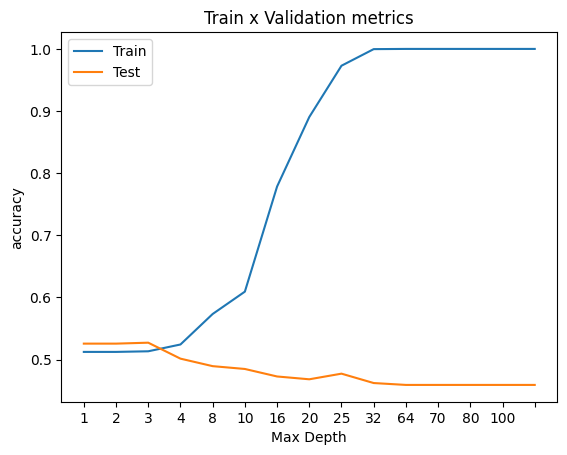

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset

    predictions_val = model.predict(x_test) ## The predicted values for the test dataset

    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('Max Depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

From the graph,the best value for  max_depth = 25

 Creating a DecisionTreeClassifier instance with :

* **Maximum depth =  25.**
* **Minnimum sample split = 30.**

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 30,
                                             max_depth =25,
                                             random_state = 42).fit(x_train,y_train)

Generating predictions on both the training and test datasets for Decision Tree model evaluation.

In [ ]:
y_pred=decision_tree_model.predict(x_test)
y_pred_train=decision_tree_model.predict(x_train)

Examining the model's accuracy by evaluating its performance on both the training and testing datasets.

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_pred_train,y_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_pred,y_test)*100:.2f}")

Metrics train:
	Accuracy score: 72.97
Metrics Test:
	Accuracy score: 48.64


* The Decision Tree model displays a significantly lower performance at 48%, even after optimizing its parameters, in contrast to logistic regression, which performs better.

Visualizing the Decsison Tree confusion matrix to further evaluate the model's performance.

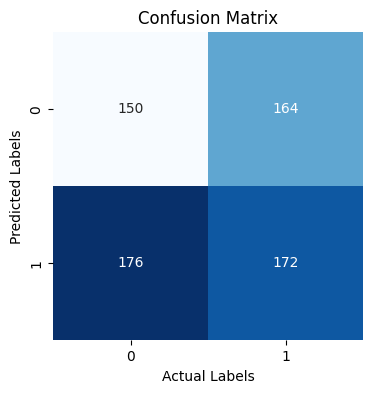

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

Based on this Conusion matrix Evaluation :

* **150** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **172** instances were correctly predicted as class 1 **```(True Positives)```**.

* **164** instances were predicted as class 1 but were actually class 0 **```(False Positives)```**.
* **176** instances were predicted as class 0 but were actually class 1 **```(False Negatives)```**.


The confusion matrix of the decision tree model indicates inefficiency as the model mispredicts approximately half of the values for both classes.

In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       314
           1       0.51      0.49      0.50       348

    accuracy                           0.49       662
   macro avg       0.49      0.49      0.49       662
weighted avg       0.49      0.49      0.49       662




The Decision Tree model shows inefficiency as it accurately predicts only about half of both classes while mispredicting the other half. Moreover, its accuracy, F1-score, and precision metrics are notably low, indicating overall poor performance.

### Random Forest

Exploring the implementation of Random Forest as a potential solution for achieving improved performance and accuracy in predictive modeling.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Iterating through all values in the Min samples split list to assess our model's performance on both train and test data, emphasizing the objective of preventing overfitting by finding an optimal parameter value for splitting nodes.

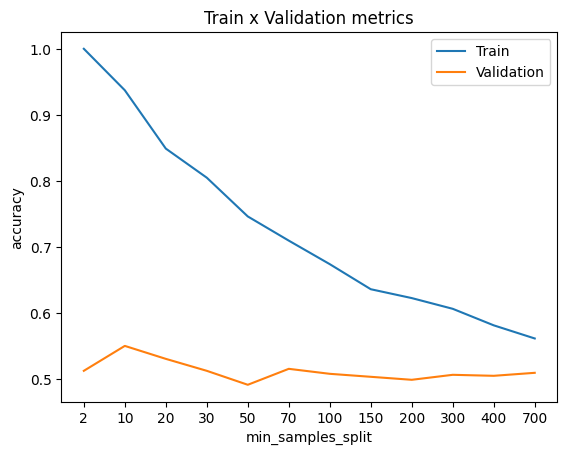

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

From the graph,the best value for  min_samples_split = 20

Iterating through all values in the Max depth list to evaluate our model's performance on both train and test data, with the primary aim of preventing overfitting by identifying the most suitable parameter value for the maximum depth of decision tree nodes.

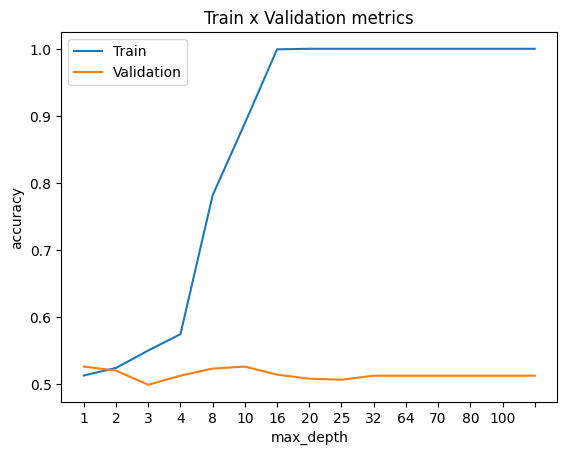

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

From the graph,the best value for  max_depth = 10

Iterating through the n_estimators (Trees) list to assess the model's performance on both training and testing datasets, with the key objective of mitigating overfitting and improving the model's ability to generalize effectively.

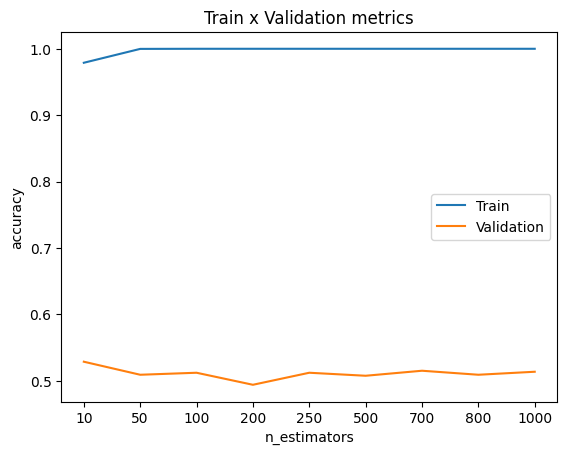

In [ ]:
n_estimators_list = [10,50,100,200,250,500,700,800,1000]
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42).fit(x_train,y_train)
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

From the graph,the best value for  n_estimators = 100

Training a Random Forest Classifier with :

* **max_depth = 10.**
* **min_samples_split = 20.**
* **n_estimators = 100.**

This values are achieved from analyzing the above graphs to ensure using the best parameter values.

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 10,
                                             min_samples_split = 20).fit(x_train,y_train)

Generating predictions on both the training and test datasets for Random Forest model evaluation.

In [ ]:
y_pred=random_forest_model.predict(x_test)
y_pred_train=random_forest_model.predict(x_train)


Evaluating the accuracy of predictions made on both the training and testing datasets.

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_pred_train,y_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_pred,y_test)*100:.2f}")

Metrics train:
	Accuracy score: 77.95
Metrics Test:
	Accuracy score: 51.21


* Regarding accuracy scores, the Random Forest model shows a slight improvement compared to the Decision Tree model. However, when compared to Logistic Regression, it still exhibits inefficiency. Additionally, there's a minor indication of overfitting due to the considerable gap observed between the training and testing accuracy.






Visualizing the Random Forest confusion matrix to further evaluate the model's performance.

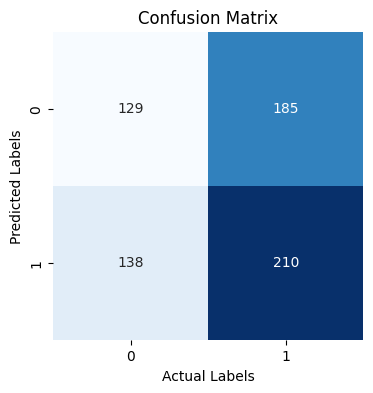

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

Based on this Conusion matrix Evaluation :

* **129** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **210** instances were correctly predicted as class 1 **```(True Positives)```**.

* **185** instances were predicted as class 1 but were actually class 0 **```(False Positives)```**.
* **138** instances were predicted as class 0 but were actually class 1 **```(False Negatives)```**.


The confusion matrix of the Random Forest model reveals considerable mispredictions in both classes, indicating inefficiency. However, these mispredictions are slightly better compared to those of the Decision Trees.

In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.48      0.41      0.44       314
           1       0.53      0.60      0.57       348

    accuracy                           0.51       662
   macro avg       0.51      0.51      0.50       662
weighted avg       0.51      0.51      0.51       662




The classification report of the Random Forest model highlights significantly lower metrics for Class 0, showing notably low precision, recall, and F1-score compared to other models. For Class 1, the metrics are comparable to other models, albeit slightly lower.




* These metrics and findings suggest that both the Decision Tree and Random Forest models did not exhibit any improvement in predictive performance compared to Logistic Regression. Instead, they showcase poor performance on the given dataset.

### 3.4) XGBoost



Attempting to employ the XGBoost Classifier aiming for an enhancement in model performance.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


Employing **RandomSearch** to find the most suitable parameters for the XGBoost model, aiming to enhance accuracy by systematically exploring various parameter combinations.

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500, 200,700,800],
    'learning_rate': [0.1, 0.2, 0.3,0.01,0.02,0.5,1],
    'max_depth': [3, 5, 7, 20, 100, 200, 300,None,500],
    'gamma':[1,2,3,4,5,6,7,8,9,10]
}


random_search = RandomizedSearchCV(
    estimator=XGBClassifier(early_stopping_rounds=20),
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    n_jobs=4,  # Use all available cores
    verbose=2,
    random_state=42 # Set random state for reproducibility
)

# Perform random search
random_search.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric="logloss")

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-logloss:0.69233
[1]	validation_0-logloss:0.69245
[2]	validation_0-logloss:0.69270
[3]	validation_0-logloss:0.69261
[4]	validation_0-logloss:0.69220
[5]	validation_0-logloss:0.69276
[6]	validation_0-logloss:0.69339
[7]	validation_0-logloss:0.69326
[8]	validation_0-logloss:0.69326
[9]	validation_0-logloss:0.69326
[10]	validation_0-logloss:0.69326
[11]	validation_0-logloss:0.69326
[12]	validation_0-logloss:0.69326
[13]	validation_0-logloss:0.69326
[14]	validation_0-logloss:0.69326
[15]	validation_0-logloss:0.69326
[16]	validation_0-logloss:0.69326
[17]	validation_0-logloss:0.69326
[18]	validation_0-logloss:0.69326
[19]	validation_0-logloss:0.69326
[20]	validation_0-logloss:0.69326
[21]	validation_0-logloss:0.69326
[22]	validation_0-logloss:0.69326
[23]	validation_0-logloss:0.69326


In [ ]:
best_params

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 2}

Based on the **RandomSearch**, the selected values for the hyperparameters of XGBoost model are ***{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 2}***


Creating an xgbclassifier model instance using the identified hyperparameter values from RandomSearch and training the model accordingly.

In [ ]:
xgb_model = XGBClassifier(n_estimators = 100,max_depth=3, learning_rate = 0.2, random_state = 42,n_jobs=5,gamma=2)
xgb_model.fit(x_train,y_train, eval_set = [(x_test,y_test)], early_stopping_rounds = 20)

[0]	validation_0-logloss:0.69233
[1]	validation_0-logloss:0.69245
[2]	validation_0-logloss:0.69270
[3]	validation_0-logloss:0.69261
[4]	validation_0-logloss:0.69220
[5]	validation_0-logloss:0.69276
[6]	validation_0-logloss:0.69339
[7]	validation_0-logloss:0.69326
[8]	validation_0-logloss:0.69326
[9]	validation_0-logloss:0.69326
[10]	validation_0-logloss:0.69326
[11]	validation_0-logloss:0.69326
[12]	validation_0-logloss:0.69326
[13]	validation_0-logloss:0.69326
[14]	validation_0-logloss:0.69326
[15]	validation_0-logloss:0.69326
[16]	validation_0-logloss:0.69326
[17]	validation_0-logloss:0.69326
[18]	validation_0-logloss:0.69326
[19]	validation_0-logloss:0.69326
[20]	validation_0-logloss:0.69326
[21]	validation_0-logloss:0.69326
[22]	validation_0-logloss:0.69326
[23]	validation_0-logloss:0.69326


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=5,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_model.best_iteration

4

Generating predictions on both the training and test datasets for XGBoost Classifier model evaluation.

In [ ]:
y_pred=xgb_model.predict(x_test)
y_pred_train=xgb_model.predict(x_train)


Evaluating the accuracy of predictions made on both the training and testing datasets.

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_pred_train,y_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_pred,y_test)*100:.2f}")

Metrics train:
	Accuracy score: 53.08
Metrics Test:
	Accuracy score: 53.32



XGBoost performs better than Decision Tree and Random Forest models in accuracy. There's no overfitting, seen in the similar training and testing accuracy. However, XGBoost slightly lags behind the adjusted threshold Logistic Regression model in performance.

Visualizing the XGBoost confusion matrix to further evaluate the model's performance.

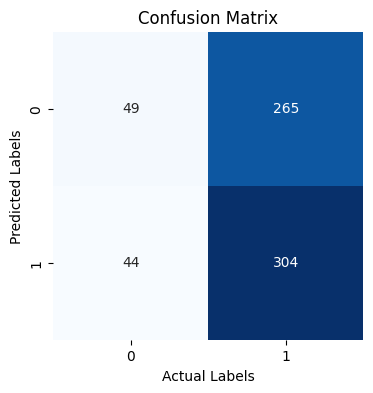

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

Based on this Conusion matrix Evaluation :

* **49** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **304** instances were correctly predicted as class 1 **```(True Positives)```**.

* **265** instances were predicted as class 1 but were actually class 0 **```(False Positives)```**.
* **44** instances were predicted as class 0 but were actually class 1 **```(False Negatives)```**.


The confusion matrix of the XGBoost model indicates its poor performance. It tends to mispredict over half of Class 0 entries, while its mistakes for Class 1 are relatively low. This suggests that despite its lower mispredictions for Class 1, the model's frequent errors in predicting Class 0 values are very considerable.



In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      0.16      0.24       314
           1       0.53      0.87      0.66       348

    accuracy                           0.53       662
   macro avg       0.53      0.51      0.45       662
weighted avg       0.53      0.53      0.46       662



* The classification report of the XGBoost model reveals extremely low precision, recall, and F1-score metrics for class 0. This confirms the model's high errors and mispredictions for entries of class 0, signifying very poor performance and unreliability, particularly in this sensitive domain.

* Conversely, the metrics for class 1 appear notably high, suggesting the model's effectiveness in correctly predicting abnormal cases. However, the substantial errors in identifying normal cases as abnormal are significant and need consideration.

### 3.5) SVM


Lastly,Attempting to employ the SVM Classifier model aiming for an enhancement in model performance comparing to the previous models.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


Employing **GridSearch** to find the most suitable parameters for the SVM model, aiming to enhance accuracy by systematically exploring various parameter combinations.

In [ ]:
svm_model = SVC(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'C': [0.1, 2,1,0.3,0.5,0.2],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3,5,10]

}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid , scoring='accuracy', cv=2, n_jobs=10, verbose=2)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 2 folds for each of 144 candidates, totalling 288 fits


In [ ]:
best_params

{'C': 0.1, 'degree': 10, 'gamma': 'auto', 'kernel': 'poly'}

Based on the **GridSearch**, the selected values for the hyperparameters of SVM model are ***{C : 0.1 , degree : 10, gamma : auto, kernel : poly}***

Creating an xgbclassifier model instance using the identified hyperparameter values from RandomSearch and training the model accordingly.

In [ ]:
svm_model = SVC(kernel='poly', C=0.1, gamma='auto',degree=10, random_state=42)
svm_model.fit(x_train,y_train)

SVC(C=0.1, degree=10, gamma='auto', kernel='poly', random_state=42)

Generating predictions on both the training and test datasets for SVM model evaluation.

In [ ]:
y_pred=svm_model.predict(x_test)
y_pred_train=svm_model.predict(x_train)


Evaluating the accuracy of predictions made on both the training and testing datasets.

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_pred_train,y_train)*100:.2f}")
print(f"Metrics Test:\n\tAccuracy score: {accuracy_score(y_pred,y_test)*100:.2f}")

Metrics train:
	Accuracy score: 57.69
Metrics Test:
	Accuracy score: 53.17


Visualizing the SVM confusion matrix to further evaluate the model's performance.

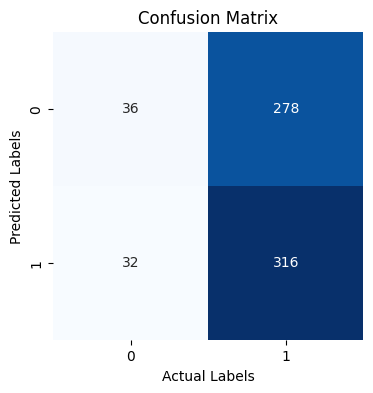

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

plt.show()

Based on this Conusion matrix Evaluation :

* **36** instances were correctly predicted as class 0 **```(True Negatives)```**.

* **316** instances were correctly predicted as class 1 **```(True Positives)```**.

* **278** instances were predicted as class 1 but were actually class 0 **```(False Positives)```**.
* **32** instances were predicted as class 0 but were actually class 1 **```(False Negatives)```**.

The confusion matrix of the SVM model is similar to XGBoost model.indicates its poor performance. It tends to mispredict over half of Class 0 entries, while its mistakes for Class 1 are relatively low. This suggests that despite its lower mispredictions for Class 1, the model's frequent errors in predicting Class 0 values are very considerable.






In [ ]:
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.53      0.11      0.19       314
           1       0.53      0.91      0.67       348

    accuracy                           0.53       662
   macro avg       0.53      0.51      0.43       662
weighted avg       0.53      0.53      0.44       662



Similar to the XGBoost model,svm model tends to misspredict over half of the class 0 entries

* The classification report of the SVM model reveals extremely low precision, recall, and F1-score metrics for class 0 where it is more lower even than XGBoost model. This confirms the model's high errors and mispredictions for entries of class 0, signifying very poor performance and unreliability, particularly in this sensitive domain.

* Conversely, the metrics for class 1 appear notably high, suggesting the model's effectiveness in correctly predicting abnormal cases. However, the substantial errors in identifying normal cases as abnormal are significant and need consideration.

##Conclusion

* The Logistic Regression model with an adjusted threshold achieved higher accuracy and better average precision, recall, and F1-scores for both classes compared to all other models. It appears to be the most efficient model for this dataset. However, all models' accuracy scores in this sensitive domain aren't highly favorable, suggesting potential high errors in the data even after preprocessing and any subsequent adjustments.